In [ ]:
# !pip install kaleido --user

In [2]:
import numpy as np
import pandas as pd
import plotly.io as pio
import plotly.express as px
import plotly.graph_objects as go

In [3]:
# initialize data of lists
#topic 0
data = {'year': ['1950-59', '1960-69', '1970-79', '1980-89', '1990-99', '2000-2009', '2010-2019'],
		'value': [395, 882, 240, 625, 411, 687, 1174],
        'topics': ['union, company, industry, labor, soviet',
                   'labor, union, company, worker, automtion',
                   'company, industry, union, state, worker',
                   'company, computer, industry, system, percent',
                   'company, system, computer, percent, million',
                   'company, system, technology, computer, percent',
                   'company, people, state, worker, trump'],
        'color': ['violet', 'indigo', 'blue', 'green', 'yellow', 'orange', 'red']
       }

# Create DataFrame
df = pd.DataFrame(data)

# Print the output.
display(df)

,year,value,topics,color
0,1950-59,395,"union, company, industry, labor, soviet",violet
1,1960-69,882,"labor, union, company, worker, automtion",indigo
2,1970-79,240,"company, industry, union, state, worker",blue
3,1980-89,625,"company, computer, industry, system, percent",green
4,1990-99,411,"company, system, computer, percent, million",yellow
5,2000-2009,687,"company, system, technology, computer, percent",orange
6,2010-2019,1174,"company, people, state, worker, trump",red


# Method 1

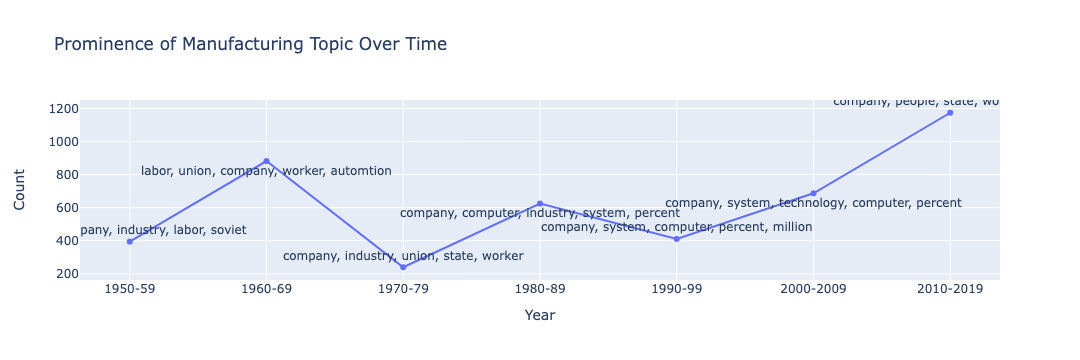

In [15]:
fig = px.line(df,
                     x='year',
                     y='value',
                     # size='dot_size',
                     text='topics',
                     # log_x=True,
                     labels={
                         "year": "Year",
                         "value": "Count",
                         # 'dot_size': 'Portability',
                         'topics': 'Topics '
                     },
                     title='Prominence of Manufacturing Topic Over Time',  # take some vertical space
                     )

def improve_text_position(x):
    """ it is more efficient if the x values are sorted """
    positions = ['top center', 'bottom center']  # you can add more: left center ...
    return [positions[i % len(positions)] for i in range(len(x))]

fig.update_traces(textposition=improve_text_position(df['year']))
fig.show()

# Method 2 (WINNER!)

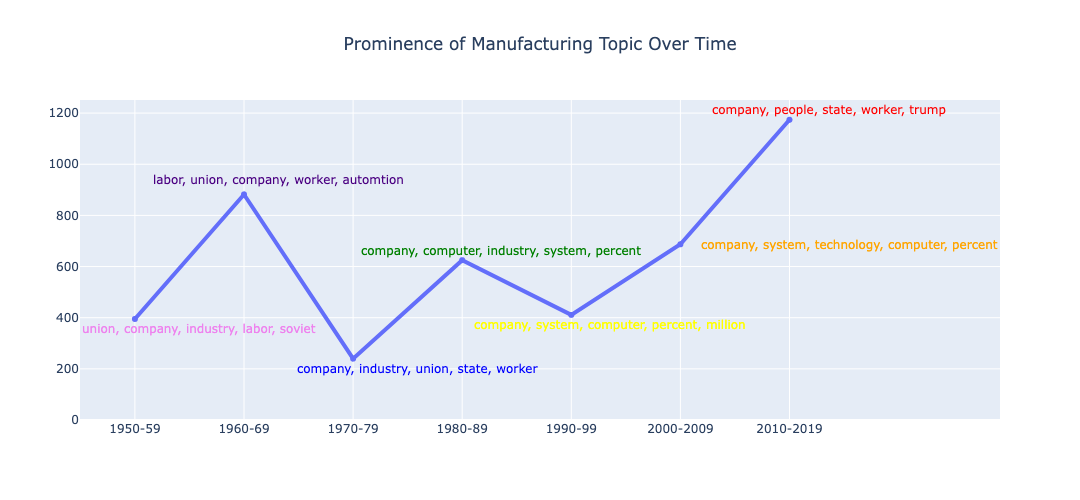

In [31]:
colors = ['violet', 'indigo', 'blue', 'green', 'yellow', 'orange', 'red']

fig = go.Figure()
fig.add_trace(go.Scatter(
    x=['1950-59', '1960-69', '1970-79', '1980-89', '1990-99', '2000-2009', '2010-2019'],
    y=[395, 882, 240, 625, 411, 687, 1174]
))

fig.add_annotation(x=1, y=395,
            text="union, company, industry, labor, soviet",
            showarrow=False,
            yshift=-10,
            xshift=-45,
            font=dict(color=colors[0]))
fig.add_annotation(x=2, y=882,
            text="labor, union, company, worker, automtion",
            showarrow=False,
            yshift=15,
            xshift=-75,
            font=dict(color=colors[1]))
fig.add_annotation(x=3, y=240,
            text="company, industry, union, state, worker",
            showarrow=False,
            yshift=-10,
            xshift=-45,
            font=dict(color=colors[2]))
fig.add_annotation(x=4, y=625,
            text="company, computer, industry, system, percent",
            showarrow=False,
            yshift=10,
            xshift=-70,
            font=dict(color=colors[3]))
fig.add_annotation(x=5, y=411,
            text="company, system, computer, percent, million",
            showarrow=False,
            yshift=-10,
            xshift=-70,
            font=dict(color=colors[4]))
fig.add_annotation(x=6, y=687,
            text="company, system, technology, computer, percent",
            showarrow=False,
            xshift=60,
            font=dict(color=colors[5]))
fig.add_annotation(x=7, y=1174,
            text="company, people, state, worker, trump",
            showarrow=False,
            xshift=-70,
            yshift=10,
            font=dict(color=colors[6]))

fig.update_layout(height=500, title_x=0.5, title_text='Prominence of Manufacturing Topic Over Time')
fig.update_xaxes(tickmode='linear')
fig.update_xaxes(rangemode="tozero")
fig.update_yaxes(rangemode="tozero")
fig.update_traces(line=dict(width=4))

fig.show()

# Method 3 (Incomplete: adding text box)

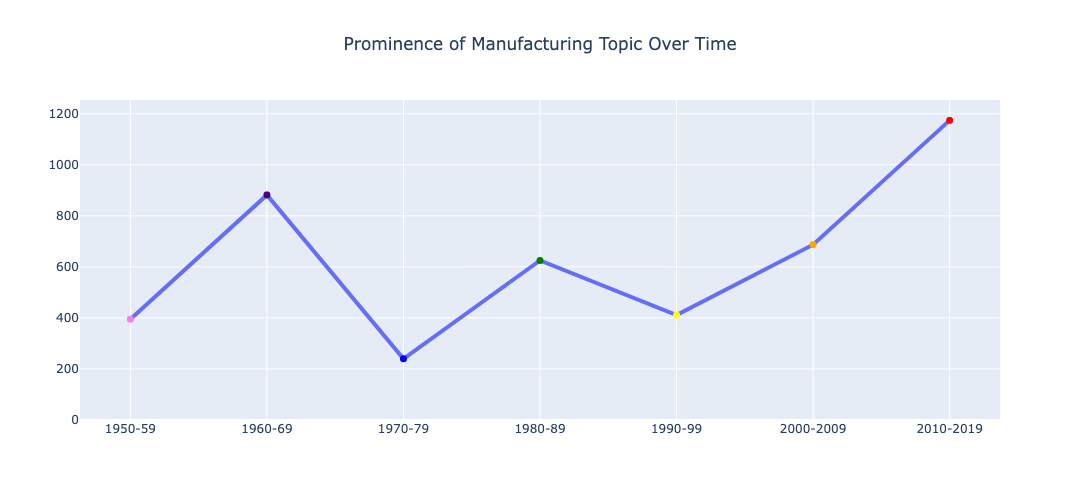

In [17]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Scatter(
    x=df['year'],
    y=df['value'],
    marker=dict(size=7, color=df['color'])
))

fig.update_layout(height=500, title_x=0.5, title_text='Prominence of Manufacturing Topic Over Time')
fig.update_xaxes(tickmode='linear')
fig.update_xaxes(rangemode="tozero")
fig.update_yaxes(rangemode="tozero")
fig.update_traces(line=dict(width=4))

fig.show()

In [ ]:
"""
fig.add_annotation(dict(font=dict(color='red', size=15),
                        x=0,
                        y=-0.12,
                        showarrow=False,
                        text="A very clear explanation",
                        textangle=0,
                        xanchor='left',
                        xref="paper",
                        yref="paper"))
"""

# Method 4

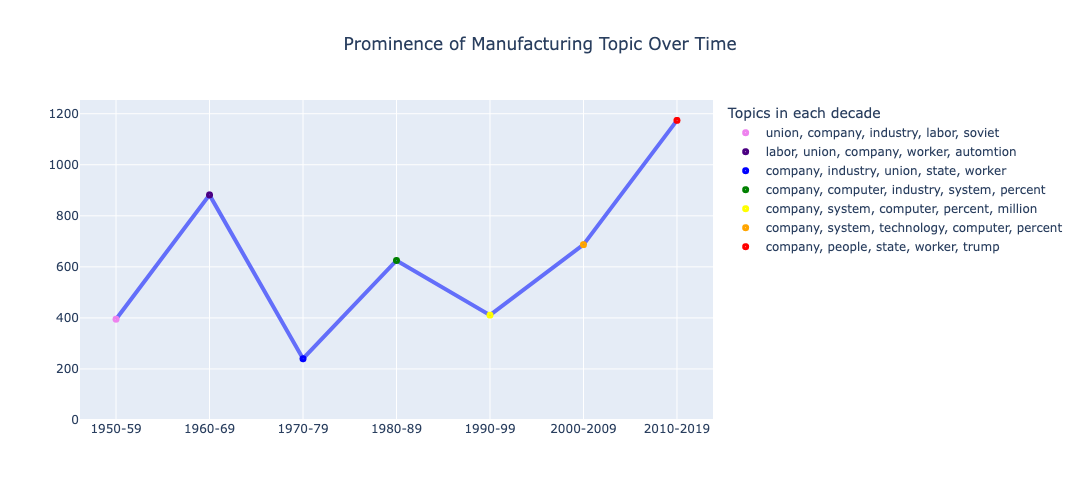

In [22]:
fig = go.Figure()
topics =['union, company, industry, labor, soviet',
         'labor, union, company, worker, automtion',
         'company, industry, union, state, worker',
         'company, computer, industry, system, percent',
         'company, system, computer, percent, million',
         'company, system, technology, computer, percent',
         'company, people, state, worker, trump']
colors = ['violet', 'indigo', 'blue', 'green', 'yellow', 'orange', 'red']
data = [
        go.Scatter(
            mode="lines+markers",
            x=df['year'],
            y=df['value'],
            marker=dict(size=7, color=df['color'], symbol='circle-dot'),
            showlegend= False
        ),

        #Custom Legend
        go.Scatter(
            x=[None],
            y=[None],
            mode="markers",
            name=topics[0],
            marker=dict(size=7, color=colors[0], symbol='circle-dot'),
        ),
        go.Scatter(
            x=[None],
            y=[None],
            mode="markers",
            name=topics[1],
            marker=dict(size=7, color=colors[1], symbol='circle-dot'),
        ),
        go.Scatter(
            x=[None],
            y=[None],
            mode="markers",
            name=topics[2],
            marker=dict(size=7, color=colors[2], symbol='circle-dot'),
        ),
        go.Scatter(
            x=[None],
            y=[None],
            mode="markers",
            name=topics[3],
            marker=dict(size=7, color=colors[3], symbol='circle-dot'),
        ),
        go.Scatter(
            x=[None],
            y=[None],
            mode="markers",
            name=topics[4],
            marker=dict(size=7, color=colors[4], symbol='circle-dot'),
        ),
        go.Scatter(
            x=[None],
            y=[None],
            mode="markers",
            name=topics[5],
            marker=dict(size=7, color=colors[5], symbol='circle-dot'),
        ),
        go.Scatter(
            x=[None],
            y=[None],
            mode="markers",
            name=topics[6],
            marker=dict(size=7, color=colors[6], symbol='circle-dot'),
        )
    ]

fig = go.Figure(data=data)
fig.update_layout(height=500, title_x=0.5, title_text='Prominence of Manufacturing Topic Over Time', legend_title="Topics in each decade")
fig.update_xaxes(tickmode='linear')
fig.update_xaxes(rangemode="tozero")
fig.update_yaxes(rangemode="tozero")
fig.update_traces(line=dict(width=4))
fig.show()

# Method 5

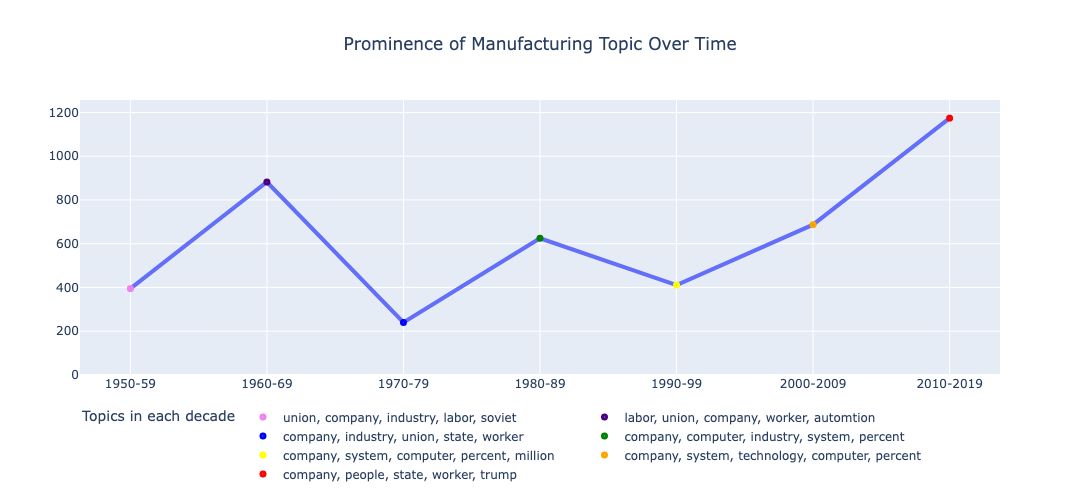

In [21]:
fig = go.Figure()
topics =['union, company, industry, labor, soviet',
         'labor, union, company, worker, automtion',
         'company, industry, union, state, worker',
         'company, computer, industry, system, percent',
         'company, system, computer, percent, million',
         'company, system, technology, computer, percent',
         'company, people, state, worker, trump']
colors = ['violet', 'indigo', 'blue', 'green', 'yellow', 'orange', 'red']
data = [
        go.Scatter(
            mode="lines+markers",
            x=df['year'],
            y=df['value'],
            marker=dict(size=7, color=df['color'], symbol='circle-dot'),
            showlegend= False
        ),

        #Custom Legend
        go.Scatter(
            x=[None],
            y=[None],
            mode="markers",
            name=topics[0],
            marker=dict(size=7, color=colors[0], symbol='circle-dot'),
        ),
        go.Scatter(
            x=[None],
            y=[None],
            mode="markers",
            name=topics[1],
            marker=dict(size=7, color=colors[1], symbol='circle-dot'),
        ),
        go.Scatter(
            x=[None],
            y=[None],
            mode="markers",
            name=topics[2],
            marker=dict(size=7, color=colors[2], symbol='circle-dot'),
        ),
        go.Scatter(
            x=[None],
            y=[None],
            mode="markers",
            name=topics[3],
            marker=dict(size=7, color=colors[3], symbol='circle-dot'),
        ),
        go.Scatter(
            x=[None],
            y=[None],
            mode="markers",
            name=topics[4],
            marker=dict(size=7, color=colors[4], symbol='circle-dot'),
        ),
        go.Scatter(
            x=[None],
            y=[None],
            mode="markers",
            name=topics[5],
            marker=dict(size=7, color=colors[5], symbol='circle-dot'),
        ),
        go.Scatter(
            x=[None],
            y=[None],
            mode="markers",
            name=topics[6],
            marker=dict(size=7, color=colors[6], symbol='circle-dot'),
        )
    ]

fig = go.Figure(data=data)
fig.update_layout(height=500, title_x=0.5, title_text='Prominence of Manufacturing Topic Over Time', 
                  legend=dict(orientation="h"), legend_title="Topics in each decade")
fig.update_xaxes(tickmode='linear')
fig.update_xaxes(rangemode="tozero")
fig.update_yaxes(rangemode="tozero")
fig.update_traces(line=dict(width=4))
fig.show()

# Method 6 (Incomplete: linking 'Topic {}' to legend

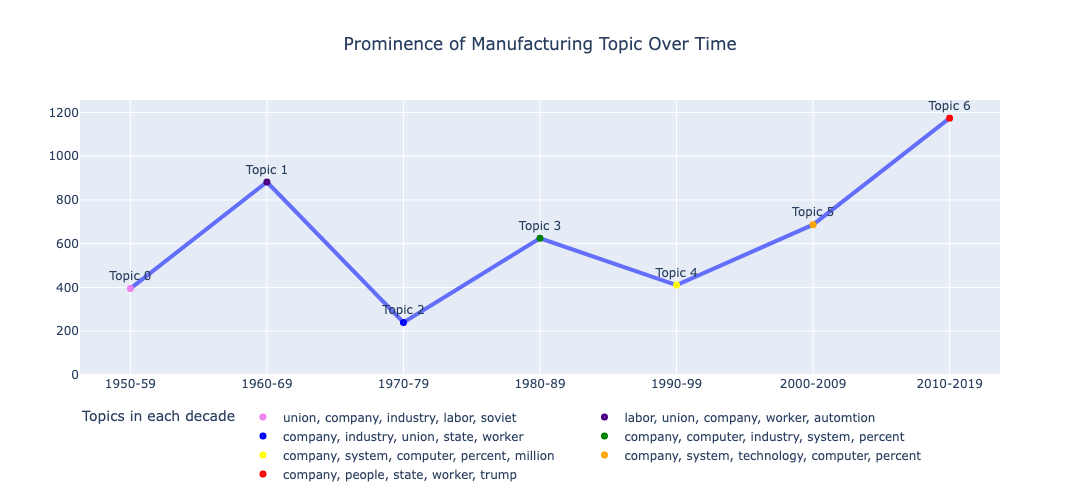

In [30]:
fig = go.Figure()
topics =['union, company, industry, labor, soviet',
         'labor, union, company, worker, automtion',
         'company, industry, union, state, worker',
         'company, computer, industry, system, percent',
         'company, system, computer, percent, million',
         'company, system, technology, computer, percent',
         'company, people, state, worker, trump']
colors = ['violet', 'indigo', 'blue', 'green', 'yellow', 'orange', 'red']
data = [
        go.Scatter(
            mode="lines+markers+text",
            x=df['year'],
            y=df['value'],
            text=["Topic 0", "Topic 1", "Topic 2", "Topic 3", "Topic 4", "Topic 5", "Topic 6"],
            textposition="top center",
            marker=dict(size=7, color=df['color'], symbol='circle-dot'),
            showlegend= False
        ),

        #Custom Legend
        go.Scatter(
            x=[None],
            y=[None],
            mode="markers",
            name=topics[0],
            marker=dict(size=7, color=colors[0], symbol='circle-dot'),
        ),
        go.Scatter(
            x=[None],
            y=[None],
            mode="markers",
            name=topics[1],
            marker=dict(size=7, color=colors[1], symbol='circle-dot'),
        ),
        go.Scatter(
            x=[None],
            y=[None],
            mode="markers",
            name=topics[2],
            marker=dict(size=7, color=colors[2], symbol='circle-dot'),
        ),
        go.Scatter(
            x=[None],
            y=[None],
            mode="markers",
            name=topics[3],
            marker=dict(size=7, color=colors[3], symbol='circle-dot'),
        ),
        go.Scatter(
            x=[None],
            y=[None],
            mode="markers",
            name=topics[4],
            marker=dict(size=7, color=colors[4], symbol='circle-dot'),
        ),
        go.Scatter(
            x=[None],
            y=[None],
            mode="markers",
            name=topics[5],
            marker=dict(size=7, color=colors[5], symbol='circle-dot'),
        ),
        go.Scatter(
            x=[None],
            y=[None],
            mode="markers",
            name=topics[6],
            marker=dict(size=7, color=colors[6], symbol='circle-dot'),
        )
    ]

fig = go.Figure(data=data)
fig.update_layout(height=500, title_x=0.5, title_text='Prominence of Manufacturing Topic Over Time', 
                  legend=dict(orientation="h"), legend_title="Topics in each decade")
fig.update_xaxes(tickmode='linear')
fig.update_xaxes(rangemode="tozero")
fig.update_yaxes(rangemode="tozero")
fig.update_traces(line=dict(width=4))
fig.show()

# Final Visualizations

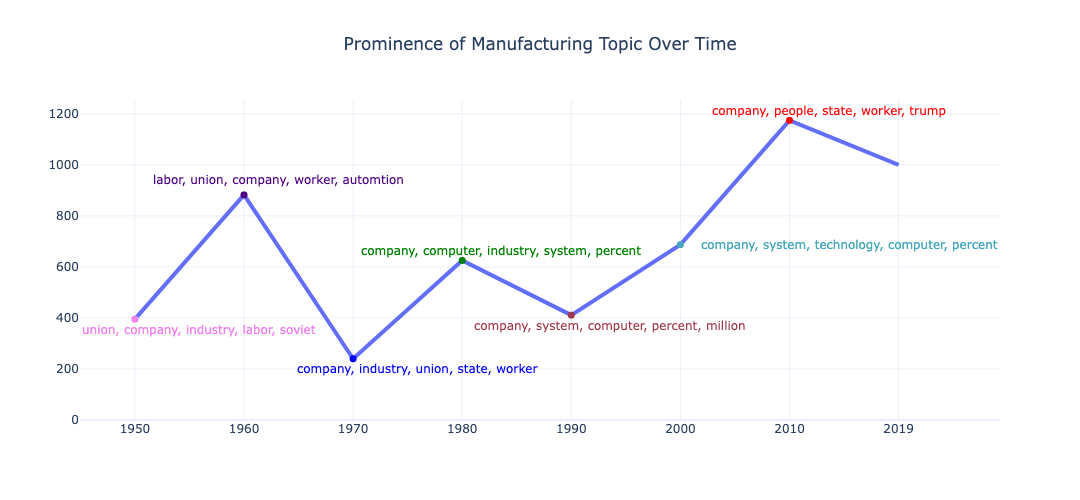

In [64]:
# topic 0
colors = ['violet', 'indigo', 'blue', 'green', '#9C3848', '#47A8BD', 'red']
dot_opacity = [1, 1, 1, 1, 1, 1, 1, 0]

fig = go.Figure()
fig.add_trace(go.Scatter(
    x=['1950', '1960', '1970', '1980', '1990', '2000', '2010', '2019'],
    y=[395, 882, 240, 625, 411, 687, 1174, 1000],
    marker=dict(size=7, color=colors, symbol='circle-dot', opacity=dot_opacity)
))

fig.add_annotation(x=1, y=395,
            text="union, company, industry, labor, soviet",
            showarrow=False,
            yshift=-10,
            xshift=-45,
            font=dict(color=colors[0]))
fig.add_annotation(x=2, y=882,
            text="labor, union, company, worker, automtion",
            showarrow=False,
            yshift=15,
            xshift=-75,
            font=dict(color=colors[1]))
fig.add_annotation(x=3, y=240,
            text="company, industry, union, state, worker",
            showarrow=False,
            yshift=-10,
            xshift=-45,
            font=dict(color=colors[2]))
fig.add_annotation(x=4, y=625,
            text="company, computer, industry, system, percent",
            showarrow=False,
            yshift=10,
            xshift=-70,
            font=dict(color=colors[3]))
fig.add_annotation(x=5, y=411,
            text="company, system, computer, percent, million",
            showarrow=False,
            yshift=-10,
            xshift=-70,
            font=dict(color=colors[4]))
fig.add_annotation(x=6, y=687,
            text="company, system, technology, computer, percent",
            showarrow=False,
            xshift=60,
            font=dict(color=colors[5]))
fig.add_annotation(x=7, y=1174,
            text="company, people, state, worker, trump",
            showarrow=False,
            xshift=-70,
            yshift=10,
            font=dict(color=colors[6]))

fig.update_layout(height=500, title_x=0.5, title_text='Prominence of Manufacturing Topic Over Time', template="plotly_white")
fig.update_xaxes(tickmode='linear')
fig.update_yaxes(rangemode="tozero")
fig.update_traces(line=dict(width=4))
fig.show()

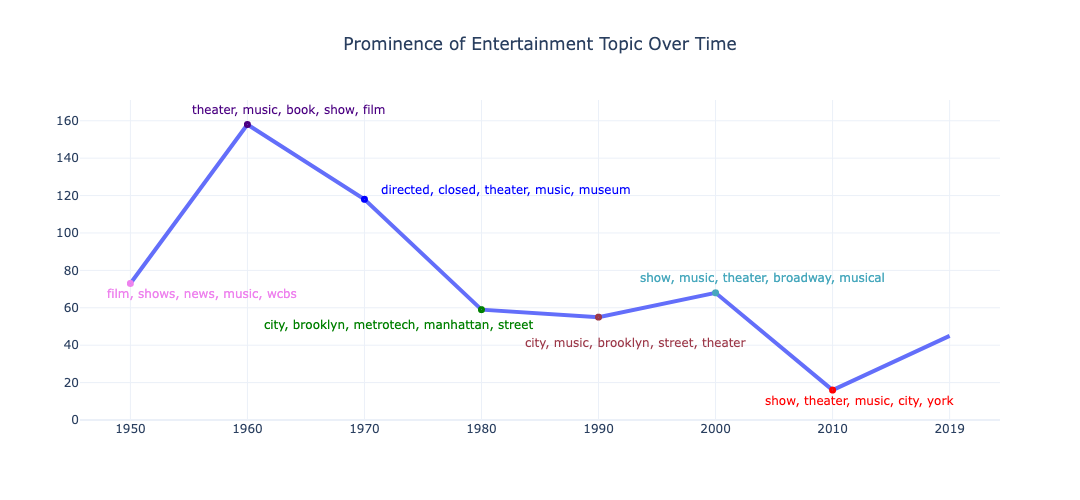

In [104]:
# topic 1
colors = ['violet', 'indigo', 'blue', 'green', '#9C3848', '#47A8BD', 'red']
dot_opacity = [1, 1, 1, 1, 1, 1, 1, 0]

fig = go.Figure()
fig.add_trace(go.Scatter(
    x=['1950', '1960', '1970', '1980', '1990', '2000', '2010', '2019'],
    y=[73, 158, 118, 59, 55, 68, 16, 45],
    marker=dict(size=7, color=colors, symbol='circle-dot', opacity=dot_opacity)
))

fig.add_annotation(x=1, y=73,
            text="film, shows, news, music, wcbs",
            showarrow=False,
            yshift=-10,
            xshift=-45,
            font=dict(color=colors[0]))
fig.add_annotation(x=2, y=158,
            text="theater, music, book, show, film",
            showarrow=False,
            yshift=15,
            xshift=-75,
            font=dict(color=colors[1]))
fig.add_annotation(x=3, y=118,
            text="directed, closed, theater, music, museum",
            showarrow=False,
            yshift=10,
            xshift=25,
            font=dict(color=colors[2]))
fig.add_annotation(x=4, y=59,
            text="city, brooklyn, metrotech, manhattan, street",
            showarrow=False,
            yshift=-15,
            xshift=-200,
            font=dict(color=colors[3]))
fig.add_annotation(x=5, y=55,
            text="city, music, brooklyn, street, theater",
            showarrow=False,
            yshift=-25,
            xshift=-80,
            font=dict(color=colors[4]))
fig.add_annotation(x=6, y=68,
            text="show, music, theater, broadway, musical",
            showarrow=False,
            yshift=15,
            xshift=-70,
            font=dict(color=colors[5]))
fig.add_annotation(x=7, y=16,
            text="show, theater, music, city, york",
            showarrow=False,
            xshift=-90,
            yshift=-10,
            font=dict(color=colors[6]))

fig.update_layout(height=500, title_x=0.5, title_text='Prominence of Entertainment Topic Over Time', template="plotly_white")
fig.update_xaxes(tickmode='linear')
fig.update_yaxes(rangemode="tozero")
fig.update_traces(line=dict(width=4))
fig.show()

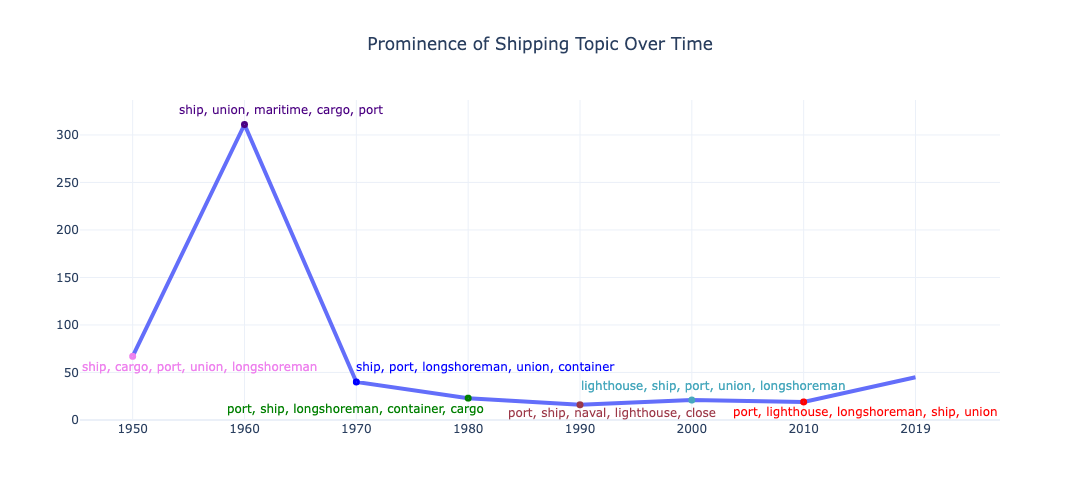

In [121]:
# topic 2
colors = ['violet', 'indigo', 'blue', 'green', '#9C3848', '#47A8BD', 'red']
dot_opacity = [1, 1, 1, 1, 1, 1, 1, 0]

fig = go.Figure()
fig.add_trace(go.Scatter(
    x=['1950', '1960', '1970', '1980', '1990', '2000', '2010', '2019'],
    y=[67, 311, 40, 23, 16, 21, 19, 45],
    marker=dict(size=7, color=colors, symbol='circle-dot', opacity=dot_opacity)
))

fig.add_annotation(x=1, y=67,
            text="ship, cargo, port, union, longshoreman",
            showarrow=False,
            yshift=-10,
            xshift=-45,
            font=dict(color=colors[0]))
fig.add_annotation(x=2, y=311,
            text="ship, union, maritime, cargo, port",
            showarrow=False,
            yshift=15,
            xshift=-75,
            font=dict(color=colors[1]))
fig.add_annotation(x=3, y=40,
            text="ship, port, longshoreman, union, container",
            showarrow=False,
            yshift=15,
            xshift=17,
            font=dict(color=colors[2]))
fig.add_annotation(x=4, y=23,
            text="port, ship, longshoreman, container, cargo",
            showarrow=False,
            yshift=-10,
            xshift=-225,
            font=dict(color=colors[3]))
fig.add_annotation(x=5, y=16,
            text="port, ship, naval, lighthouse, close",
            showarrow=False,
            yshift=-8,
            xshift=-80,
            font=dict(color=colors[4]))
fig.add_annotation(x=6, y=21,
            text="lighthouse, ship, port, union, longshoreman",
            showarrow=False,
            yshift=15,
            xshift=-90,
            font=dict(color=colors[5]))
fig.add_annotation(x=7, y=19,
            text="port, lighthouse, longshoreman, ship, union",
            showarrow=False,
            xshift=-50,
            yshift=-10,
            font=dict(color=colors[6]))

fig.update_layout(height=500, title_x=0.5, title_text='Prominence of Shipping Topic Over Time', template="plotly_white")
fig.update_xaxes(tickmode='linear')
fig.update_yaxes(rangemode="tozero")
fig.update_traces(line=dict(width=4))
fig.show()

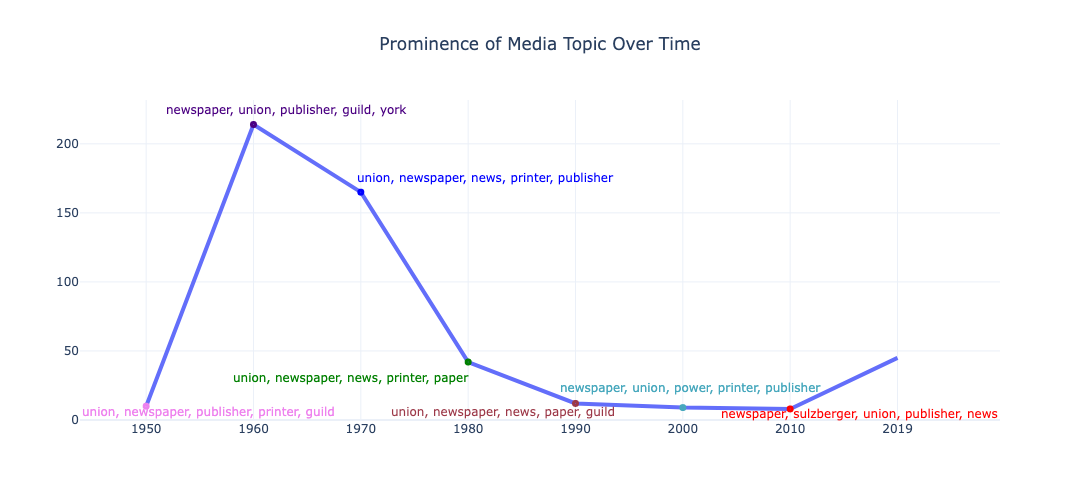

In [163]:
# topic 3
colors = ['violet', 'indigo', 'blue', 'green', '#9C3848', '#47A8BD', 'red']
dot_opacity = [1, 1, 1, 1, 1, 1, 1, 0]

fig = go.Figure()
fig.add_trace(go.Scatter(
    x=['1950', '1960', '1970', '1980', '1990', '2000', '2010', '2019'],
    y=[10, 214, 165, 42, 12, 9, 8, 45],
    marker=dict(size=7, color=colors, symbol='circle-dot', opacity=dot_opacity)
))

fig.add_annotation(x=1, y=10,
            text="union, newspaper, publisher, printer, guild",
            showarrow=False,
            yshift=-5,
            xshift=-45,
            font=dict(color=colors[0]))
fig.add_annotation(x=2, y=214,
            text="newspaper, union, publisher, guild, york",
            showarrow=False,
            yshift=15,
            xshift=-75,
            font=dict(color=colors[1]))
fig.add_annotation(x=3, y=165,
            text="union, newspaper, news, printer, publisher",
            showarrow=False,
            yshift=15,
            xshift=17,
            font=dict(color=colors[2]))
fig.add_annotation(x=4, y=42,
            text="union, newspaper, news, printer, paper",
            showarrow=False,
            yshift=-15,
            xshift=-225,
            font=dict(color=colors[3]))
fig.add_annotation(x=5, y=12,
            text="union, newspaper, news, paper, guild",
            showarrow=False,
            yshift=-8,
            xshift=-180,
            font=dict(color=colors[4]))
fig.add_annotation(x=6, y=9,
            text="newspaper, union, power, printer, publisher",
            showarrow=False,
            yshift=20,
            xshift=-100,
            font=dict(color=colors[5]))
fig.add_annotation(x=7, y=8,
            text="newspaper, sulzberger, union, publisher, news",
            showarrow=False,
            xshift=-38,
            yshift=-5,
            font=dict(color=colors[6]))

fig.update_layout(height=500, title_x=0.5, title_text='Prominence of Media Topic Over Time', template="plotly_white")
fig.update_xaxes(tickmode='linear')
fig.update_yaxes(rangemode="tozero")
fig.update_traces(line=dict(width=4))
fig.show()

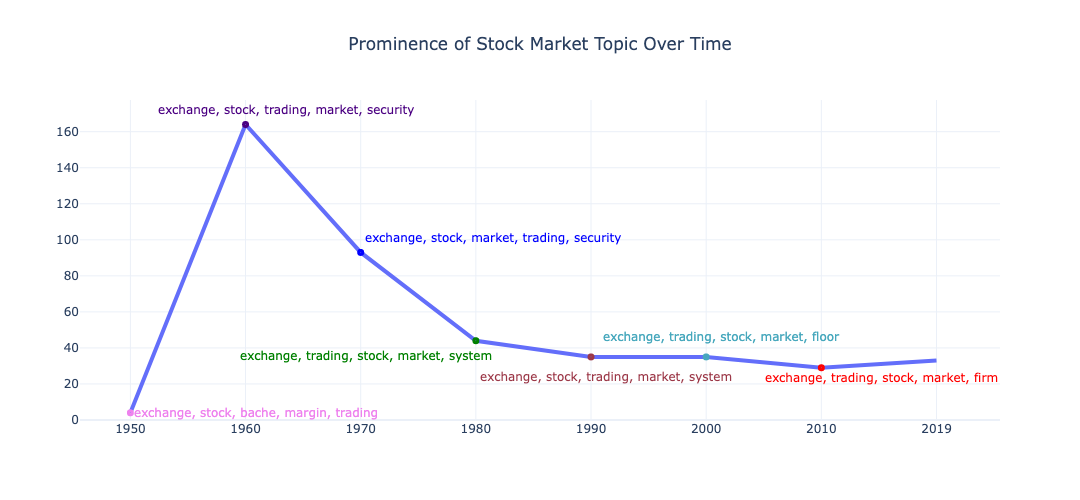

In [180]:
# topic 4
colors = ['violet', 'indigo', 'blue', 'green', '#9C3848', '#47A8BD', 'red']
dot_opacity = [1, 1, 1, 1, 1, 1, 1, 0]

fig = go.Figure()
fig.add_trace(go.Scatter(
    x=['1950', '1960', '1970', '1980', '1990', '2000', '2010', '2019'],
    y=[4, 164, 93, 44, 35, 35, 29, 33],
    marker=dict(size=7, color=colors, symbol='circle-dot', opacity=dot_opacity)
))

fig.add_annotation(x=1, y=4,
            text="exchange, stock, bache, margin, trading",
            showarrow=False,
            yshift=0,
            xshift=10,
            font=dict(color=colors[0]))
fig.add_annotation(x=2, y=164,
            text="exchange, stock, trading, market, security",
            showarrow=False,
            yshift=15,
            xshift=-75,
            font=dict(color=colors[1]))
fig.add_annotation(x=3, y=93,
            text="exchange, stock, market, trading, security",
            showarrow=False,
            yshift=15,
            xshift=17,
            font=dict(color=colors[2]))
fig.add_annotation(x=4, y=44,
            text="exchange, trading, stock, market, system",
            showarrow=False,
            yshift=-15,
            xshift=-225,
            font=dict(color=colors[3]))
fig.add_annotation(x=5, y=35,
            text="exchange, stock, trading, market, system",
            showarrow=False,
            yshift=-20,
            xshift=-100,
            font=dict(color=colors[4]))
fig.add_annotation(x=6, y=35,
            text="exchange, trading, stock, market, floor",
            showarrow=False,
            yshift=20,
            xshift=-100,
            font=dict(color=colors[5]))
fig.add_annotation(x=7, y=29,
            text="exchange, trading, stock, market, firm",
            showarrow=False,
            xshift=-55,
            yshift=-10,
            font=dict(color=colors[6]))

fig.update_layout(height=500, title_x=0.5, title_text='Prominence of Stock Market Topic Over Time', template="plotly_white")
fig.update_xaxes(tickmode='linear')
fig.update_yaxes(rangemode="tozero")
fig.update_traces(line=dict(width=4))
fig.show()